### Connaître le sens moyen des passes selon la zone du terrain : l'exemple de la France durant la coupe du monde 2018

#### Packages

In [1]:
from mplsoccer.pitch import Pitch
from mplsoccer.statsbomb import read_event, EVENT_SLUG
from matplotlib import rcParams
from scipy.stats import circmean
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import LinearSegmentedColormap
import pandas as pd

#### Fonctions

In [17]:
def createPassMap(df, player_name) :
    
    mask = (df.type_name == 'Pass') & (df.player_name == player_name)
    df_pass = df.loc[mask, ['x', 'y', 'end_x', 'end_y', 'outcome_name']]
    
    mask_complete = df_pass.outcome_name.isnull()
    df_pass=df_pass[mask_complete]

    pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', figsize=(10, 8), line_zorder=4,
                  line_color='#c7d5cc', constrained_layout=True, tight_layout=False, pitch_color='white')
    bins = (6, 6)

    fig, ax = pitch.draw()
    # plot the heatmap - darker colors = more passes originating from that square
    bs_heatmap = pitch.bin_statistic(df_pass.x, df_pass.y, statistic='count', bins=bins)
    hm = pitch.heatmap(bs_heatmap, ax=ax, cmap='Blues')
    # plot the pass flow map with a single color ('black') and length of the arrow (5)
    fm = pitch.flow(df_pass.x, df_pass.y, df_pass.end_x, df_pass.end_y, color='black', arrow_type='same',
                    arrow_length=7, bins=bins, ax=ax)

    fig.set_facecolor('white')
    

In [3]:
rcParams['text.color'] = '#c7d5cc'  # set the default text color

# get event dataframe for all games for France knockout games: , create a dataframe of the passes, and a boolean mask for the outcome
df_1 = read_event(f'{EVENT_SLUG}/7580.json',
                related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']
df_2 = read_event(f'{EVENT_SLUG}/8649.json',
                related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']
df_3 = read_event(f'{EVENT_SLUG}/8658.json',
                related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']
df_4 = read_event(f'{EVENT_SLUG}/8655.json',
                related_event_df=False, shot_freeze_frame_df=False, tactics_lineup_df=False)['event']
df=pd.concat([df_1, df_2, df_3, df_4], axis=0)

C:\Users\Admin\Anaconda3\lib\site-packages\mplsoccer\statsbomb.py:120: UserWarning: Please be responsible with Statsbomb data.Register your details on https://www.statsbomb.com/resource-centreand read the User Agreement carefully (on the same page).
  warnings.warn(statsbomb_warning)


In [4]:
top_players=["Hugo Lloris", "Lucas Hernández Pi", "Samuel Yves Umtiti", "Raphaël Varane","Benjamin Pavard",
             "Paul Pogba", 'N\"Golo Kanté', 
             "Kylian Mbappé Lottin","Blaise Matuidi",
             "Antoine Griezmann", "Olivier Giroud"]

*********
Hugo Lloris


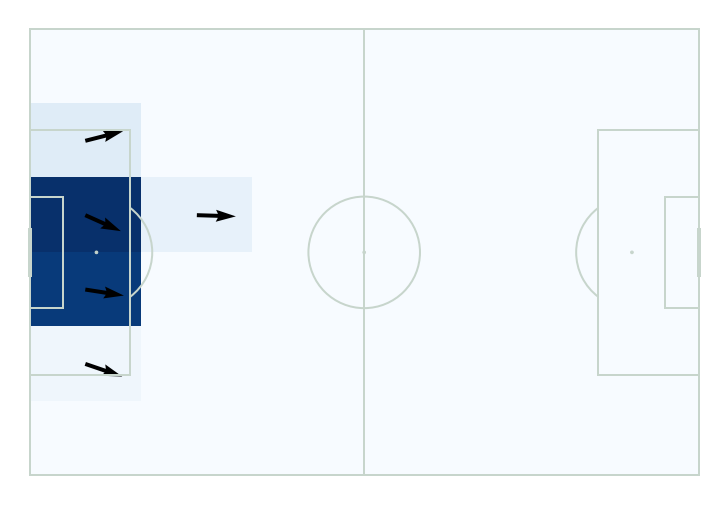

*********
Lucas Hernández Pi


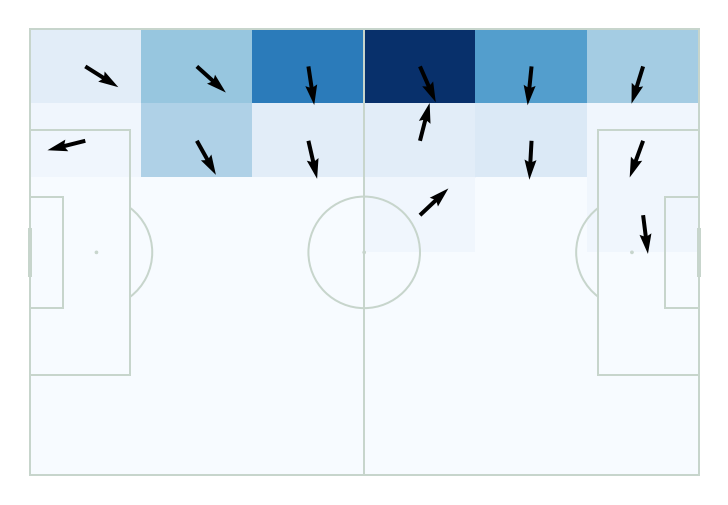

*********
Samuel Yves Umtiti


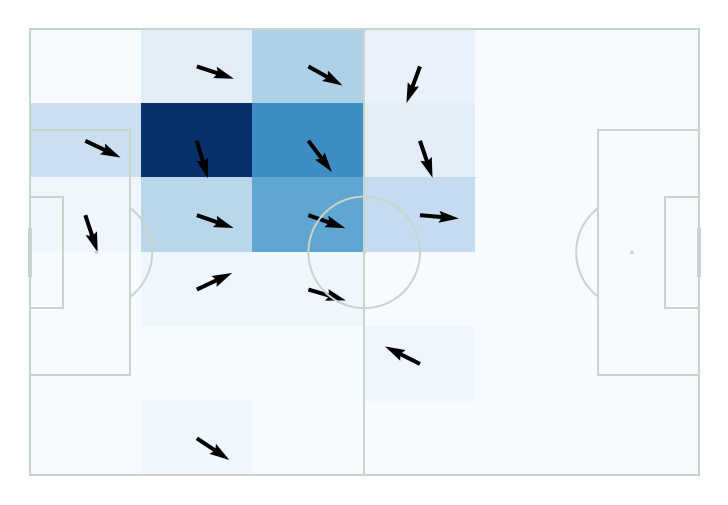

*********
Raphaël Varane


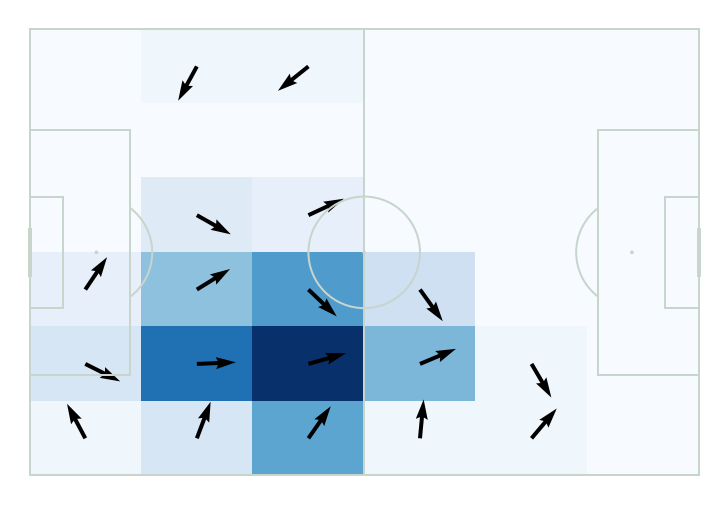

*********
Benjamin Pavard


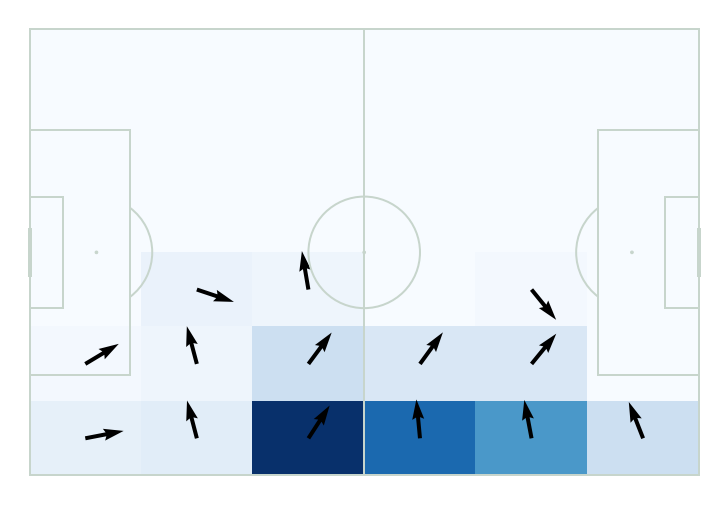

*********
Paul Pogba


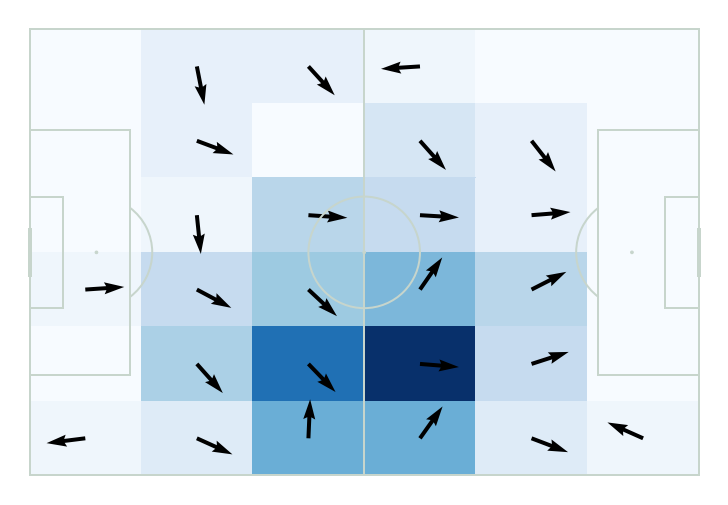

*********
N"Golo Kanté


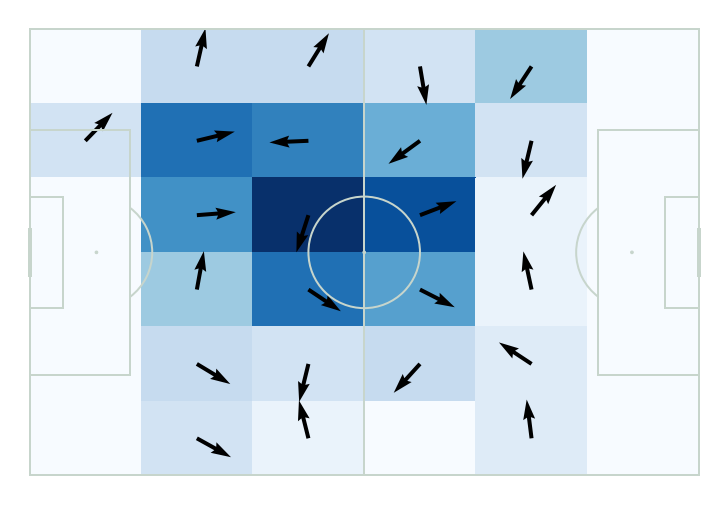

*********
Kylian Mbappé Lottin


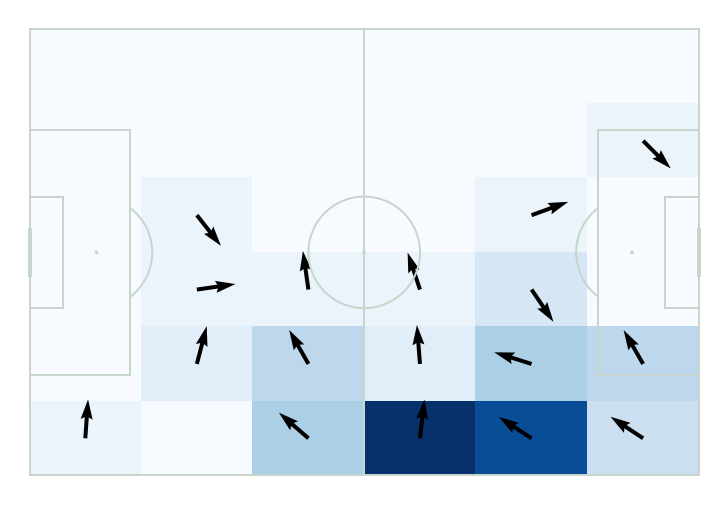

*********
Blaise Matuidi


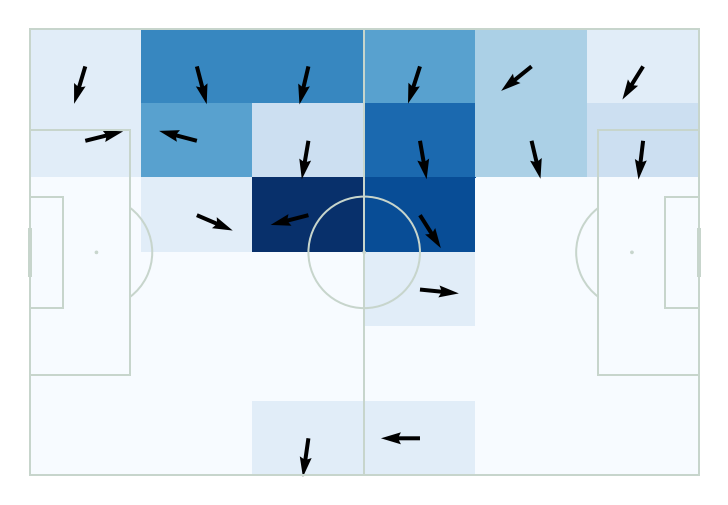

*********
Antoine Griezmann


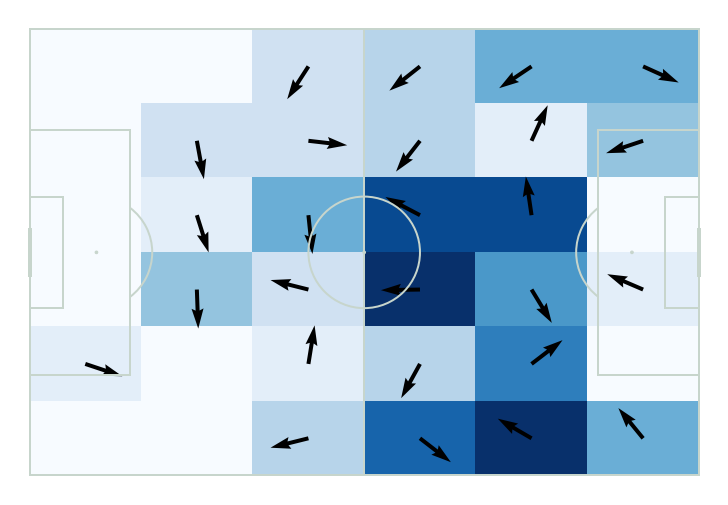

*********
Olivier Giroud


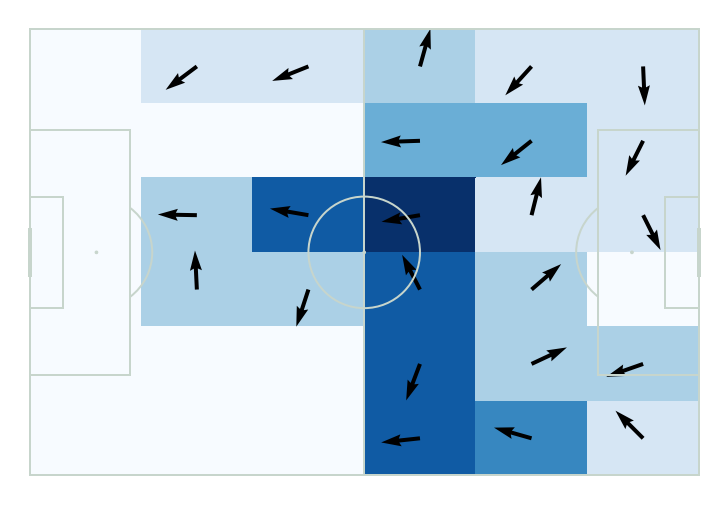

In [18]:
for player in top_players :
    print('*********')
    print(player)
    createPassMap(df, player)
    if player=='N\"Golo Kanté':
        plt.savefig('img/pass_flow_{}'.format('N Golo Kanté'))
    else:
        plt.savefig('img/pass_flow_{}'.format(player))
    plt.show()
    

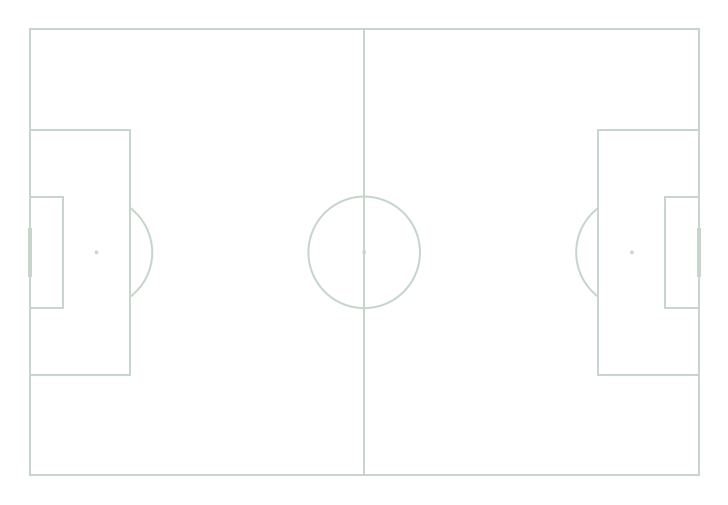

In [10]:
pitch = Pitch(pitch_type='statsbomb', orientation='horizontal', figsize=(10, 8), line_zorder=4,
                  line_color='#c7d5cc', constrained_layout=True, tight_layout=False, pitch_color='white')
fig, ax = pitch.draw()
plt.savefig('img/pitch')